In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Opening the CSV files
test = pd.read_csv('test_data.csv', encoding='cp1252')
training = pd.read_csv('training_data.csv', encoding='cp1252')

In [3]:
# Checking the column names
training.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# Dataset Head
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Dataset Description
training.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


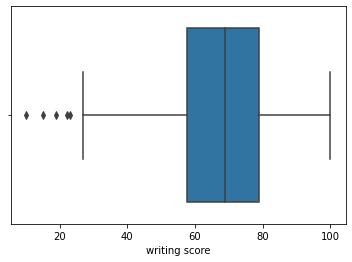

In [8]:
# Checking for outliers
ax1 = sns.boxplot(x=training['writing score'])

In [9]:
# Removing the outliers
training = training.loc[training['writing score']>=25]

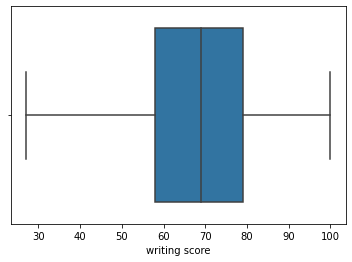

In [10]:
# Checking if there is outliers
ax1 = sns.boxplot(x=training['writing score'])

In [11]:
# Checking gender qualitative qualifiers
training['gender'].unique()

array(['female', 'male'], dtype=object)

In [12]:
# Checking race/ethnicity qualitative qualifiers
training['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
# Checking parental level of education qualitative qualifiers
training['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
# Checking lunch qualitative qualifiers
training['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
# Checking test preparation course qualitative qualifiers
training['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [24]:
# Changing qualitative qualifiers to quantitative qualifiers
training_gender_qt = {'male': 1, 'female': 2}
training_race_qt = {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
training_parentalEducation_qt = {'some high scholl': 1, 'some college': 2, 'high school': 3, "associate's degree": 4, "master's degree": 5, "bachelor's degree": 6}
training_lunch_qt = {'free/reduced': 1, 'standard' : 2}
training_testPreparation_qt = {'none': 1, 'completed': 2}

training.replace(training_gender_qt, inplace = True)
training.replace(training_race_qt, inplace = True)
training.replace(training_parentalEducation_qt, inplace = True)
training.replace(training_lunch_qt, inplace = True)
training.replace(training_testPreparation_qt, inplace = True)

test.replace(training_gender_qt, inplace = True)
test.replace(training_race_qt, inplace = True)
test.replace(training_parentalEducation_qt, inplace = True)
test.replace(training_lunch_qt, inplace = True)
test.replace(training_testPreparation_qt, inplace = True)

In [25]:
# Checking if there is any missing values
training.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [26]:
# Though there isn't any missing values, we'll use this code lines for check reasons
print(training.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


<AxesSubplot:>

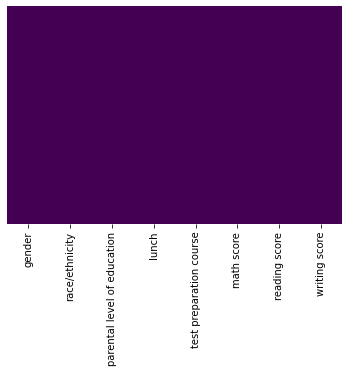

In [28]:
# Checking our dataset heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

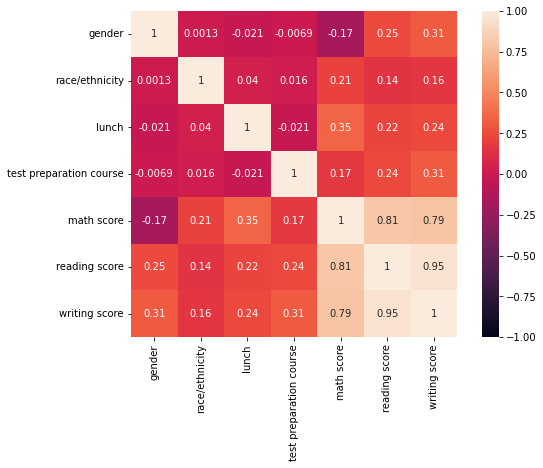

In [29]:
# Checking the correlation matrix
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [30]:
# Visualize how the dataset is at this moment 
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,74
1,2,3,2,2,2,69,90,88
2,2,2,5,2,1,90,95,93
3,1,1,4,1,1,47,57,44
4,1,3,2,2,1,76,78,75


In [31]:
# Starting to prepare the predicitons
X = training.drop(['writing score'], axis=1)
y = training['writing score']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2021)

<AxesSubplot:xlabel='writing score', ylabel='count'>

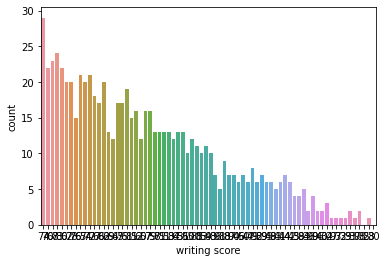

In [39]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['writing score'].value_counts().index)

<AxesSubplot:xlabel='writing score', ylabel='count'>

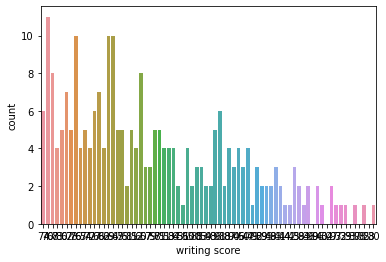

In [40]:
# Checking if the values on y_test look like the ones in y_train
sns.countplot(x = y_test, order = training['writing score'].value_counts().index)